# DA527 - JAYA PRASAD TATINENI, PROJECT#1 - TASK2

# Generated two moons with Radius = 10 points, width = 6 points and distance # = 0

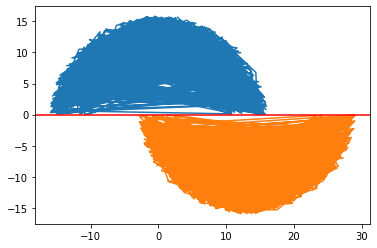

In [3]:
#CSC/ECE/DA 427/527
#Fall 2020

from random import random
import matplotlib.pyplot as plt
import math
import numpy as np

def moon(num_points,distance,radius,width):

 points = num_points

 x1 = [0 for _ in range(points)]
 y1 = [0 for _ in range(points)]
 x2 = [0 for _ in range(points)]
 y2 = [0 for _ in range(points)]

 for i in range(points):
    d = distance
    r = radius
    w = width
    a = random()*math.pi
    x1[i] = math.sqrt(random()) * math.cos(a)*(w/2) + ((-(r+w/2) if(random() < 0.5) else (r+w/2)) * math.cos(a))
    y1[i] = math.sqrt(random()) * math.sin(a)*(w) + (r * math.sin(a)) - d
  
    a = random()*math.pi + math.pi
    x2[i] = (r+w/2) + math.sqrt(random()) * math.cos(a)*(w/2) + ((-(r+w/2)) if(random() < 0.5) else (r+w/2)) * math.cos(a)
    y2[i] = -(math.sqrt(random()) * math.sin(a)*(-w) + (-r * math.sin(a))) + d
 return ([x1,x2,y1,y2])
    
x1,x2,y1,y2 = moon(1000,0,10,6)

plt.plot(x1 ,y1)
plt.plot(x2,y2)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [4]:
# x_train - is the training data set - Combination of (x1,y1) and (x2,y2)
# Ex: (x1,y1) = (2,2) or (-3,5) etc..
# y_train has Desired output = +1 or -1 depending on the data point.
# y_train holds the target values +1 or -1 depending on the following.
# If x1 > 0 and y1 > 0 then the desired out put = 1
# If x1 < 0 and y1 > 0 then the desired out put = 1
# If x1 < 0 and y1 < 0 then the desired out put = -1
# If x1 > 0 and y1 < 0 then the desired out put = -1

#x_train is used for training the data set.

x_train = []
a_list = []
b_list = []
y_train = []
for i in range(0,1000):
    a_list = []
    a_list.append(1)
    a_list.append(int(x1[i]))
    a_list.append(int(y1[i]))
    x_train.append(list(a_list))
    if x1[i] > 0 and y1[i] >0:
        y_train.append(1)
    elif x1[i] < 0 and y1[i] > 0:
        y_train.append(1)
    elif x1[i] < 0 and y1[i] < 0:
        y_train.append(-1)
    elif x1[i] > 0 and y1[i] < 0:
        y_train.append(-1)  
#    print("list(a_list):",list(a_list))
        
#    b_list = []

#    b_list.append(1)
#    b_list.append(int(x2[i]))
#    b_list.append(int(y2[i]))
#    x_train.append(list(b_list))
    
#    if x2[i] > 0 and y2[i] > 0:
#        y_train.append(1)
#    elif x2[i] < 0 and y2[i] > 0:
#        y_train.append(1)
#    elif x2[i] < 0 and y2[i] < 0:
#        y_train.append(-1)
#    elif x2[i] > 0 and y2[i] < 0:
#        y_train.append(-1) 
#   print("list(b_list):",list(b_list))        
      
#print(x_train)
   
for j in range(0,1000):
    b_list = []
    b_list.append(1)
    b_list.append(int(x2[j]))
    b_list.append(int(y2[j]))
    x_train.append(list(b_list))

    if x2[j] > 0 and y2[j] > 0:
        y_train.append(1)
    elif x2[j] < 0 and y2[j] > 0:
        y_train.append(1)
    elif x2[j] < 0 and y2[j] < 0:
        y_train.append(-1)
    elif x2[j] > 0 and y2[j] < 0:
        y_train.append(-1)    

In [20]:
# This procedure is used to calculate the new weights
# Accepts each combination of data point in X array - (x1,y1)
# y - Desired output
# eta - Learning rate

def calculatenewweights(xnew,wnew,y,index,eta):
    dotprodnew= 0
    bias = 1   #Bias = 1
    biasaddedsum = 0
    for k in range(len(xnew)):
        dotprodnew = np.dot(xnew, wnew)
    biasaddedsum = dotprodnew +bias #Adding Bias to the dot product
    if biasaddedsum >= 0:   #Checking for the Sgn Value
        yhat = 1
    elif biasaddedsum < 0:
        yhat = -1
    error = y - yhat

    for l in range(len(wnew)):
        wnew[l] = wnew[l]+(eta*error*xnew[l])
    return wnew,yhat,error

# Perceptron function
# X = Input Vector
# y - Desired output vector

def perceptron(x,y,t,lr):
    n = 1   # Initialize n
    error_array = np.ones(len(x)) # Error array
    predicted = np.ones(len(x))   # Predicted Array
    w = []  # Initialize weights
    w = np.zeros(len(x[0])) #Populate zeros for initial weights
    test_index_start = int(len(x)/2)
    test_index_end = int(len(x)/1.4)
    errorcount = 0
    while n < t: 
        print()
        print("epoch-: ",n)
        for i in range(test_index_start, test_index_end):  #Used a portion of X for testing
            w,prediction,errornew=calculatenewweights(x[i],w,y[i],i,lr) 
            error_array[i] = errornew
            predicted[i] = prediction
        print("New weights:",w)
        n += 1
        nonzeroerror = False
        for errorindex in(0,len(error_array)-1):
            if nonzeroerror == False:
               # print("error_array[errorindex]:",error_array[errorindex])
                if error_array[errorindex] != 0:
                    nonzeroerror = True
            if nonzeroerror == True:
                errorcount += 1
    print("")
    print("errorcount:",errorcount)
    errorPercent = round(((errorcount/(test_index_end-test_index_start))*100),2)
    print("errorPercent:",errorPercent)
        
# Main Program begin here.
# Total Iterations = 15
# Learning Rate = 0.05
t = 15
lr = 0.05
perceptron(x_train,y_train,t,lr)


epoch-:  1
New weights: [-0.8 -0.6  1.8]

epoch-:  2
New weights: [-1.2 -0.2  1.8]

epoch-:  3
New weights: [-1.3 -0.1  1.8]

epoch-:  4
New weights: [-1.3 -0.1  1.8]

epoch-:  5
New weights: [-1.3 -0.1  1.8]

epoch-:  6
New weights: [-1.3 -0.1  1.8]

epoch-:  7
New weights: [-1.3 -0.1  1.8]

epoch-:  8
New weights: [-1.3 -0.1  1.8]

epoch-:  9
New weights: [-1.3 -0.1  1.8]

epoch-:  10
New weights: [-1.3 -0.1  1.8]

epoch-:  11
New weights: [-1.3 -0.1  1.8]

epoch-:  12
New weights: [-1.3 -0.1  1.8]

epoch-:  13
New weights: [-1.3 -0.1  1.8]

epoch-:  14
New weights: [-1.3 -0.1  1.8]

errorcount: 28
errorPercent: 6.54
